In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import xgboost as xgb
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping
import time
import os
from typing import Dict, List, Tuple
from tensorflow.keras import layers, models
from typing import List, Dict, Tuple, Optional
from pathlib import Path



In [2]:
df = pd.read_csv("/Users/sohinikar/FL/M.Tech_Dissertation/Obfuscated-MalMem2022_train_and_test.csv")
df.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
1,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
2,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign
4,Benign,40,12,13.800000,0,306.950000,2082,52.050000,12278,306.950000,...,222,26,27,118,0,123,88,0,8,Benign


In [3]:
df.shape

(52708, 57)

In [4]:
df.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,52708.000000,52708.000000,52708.000000,52708.0,52708.000000,52708.000000,52708.000000,5.270800e+04,52708.000000,52708.0,...,52708.000000,52708.000000,52708.000000,52708.000000,52708.000000,52708.0,52708.000000,52708.000000,52708.000000,52708.000000
mean,41.398972,14.721731,11.338282,0.0,247.386149,1810.511023,43.694839,1.025501e+04,249.447942,0.0,...,391.341011,221.405916,25.996338,25.059308,116.877552,0.0,121.994574,86.903127,0.000797,7.999886
std,5.779682,2.655174,1.587059,0.0,116.714088,329.846663,5.737274,5.066323e+03,153.023360,0.0,...,4.522731,1.985979,0.165994,1.528529,1.553418,0.0,2.825147,3.134089,0.028217,0.010669
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.971429,0.0,208.700000,1556.000000,38.829268,8.393000e+03,209.634146,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.759132,1730.000000,42.731409,9.275500e+03,246.794279,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.858038,0.0,289.728806,2087.000000,49.563324,1.219200e+04,291.287373,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


In [5]:
df.shape

(52708, 57)

# Data Cleaning

In [6]:
# checking all the values in the columns are indetical
for column in df.columns:
    if df[column].nunique() == 1:
        print(f"All values in {column} are identical.")

All values in pslist.nprocs64bit are identical.
All values in handles.nport are identical.
All values in svcscan.interactive_process_services are identical.


In [7]:
columns_to_drop = ['pslist.nprocs64bit', 'handles.nport', 'svcscan.interactive_process_services']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [8]:
#checking for columns with null values

null_columns = df.columns[df.isnull().any()]
print("Columns with nulls:", list(null_columns))

Columns with nulls: []


# Encoding

In [9]:
df['Class'] = df['Class'].map({'Benign': 0, 'Malware': 1}) if df['Class'].dtype == 'object' else df['Class']

# sanity check of data before splitting

In [10]:
print("\nData Info:")
print(df.info())
print("\nFirst Few Rows:")
print(df.head())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52708 entries, 0 to 52707
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                52708 non-null  object 
 1   pslist.nproc                            52708 non-null  int64  
 2   pslist.nppid                            52708 non-null  int64  
 3   pslist.avg_threads                      52708 non-null  float64
 4   pslist.avg_handlers                     52708 non-null  float64
 5   dlllist.ndlls                           52708 non-null  int64  
 6   dlllist.avg_dlls_per_proc               52708 non-null  float64
 7   handles.nhandles                        52708 non-null  int64  
 8   handles.avg_handles_per_proc            52708 non-null  float64
 9   handles.nfile                           52708 non-null  int64  
 10  handles.nevent                          52708 

In [11]:
print("DataFrame Shape:", df.shape)
print("Class Distribution:", df["Class"].value_counts())

DataFrame Shape: (52708, 54)
Class Distribution: Class
1    26388
0    26320
Name: count, dtype: int64


In [12]:
X = df.drop(columns=['Class','Category'])
y = df["Class"]

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Steep rise initially:
The first ~10 components capture a large portion of the total variance — roughly 90–95%.
This means most of the useful information is concentrated in those first few components.

Elbow point (approx at component 10–15):
After ~15 components, the curve flattens — additional components add very little new information (variance).

Plateau near 1.0:
Around 20–25 components, you reach nearly 100% variance retained, so including more components beyond that is redundant.

# Splitting the data

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=7)

In [15]:
X_test.shape

(15813, 52)

# Feedforward Neural Network for Binary Classification (FNN-BC)

In [16]:
early_stop = EarlyStopping(
    monitor="accuracy",      # or "val_accuracy"
    mode="max",
    patience=0,              # stop as soon as it stops improving
    min_delta=0.0,           # minimum change
    verbose=1
)

In [17]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(52,)),  # 52 input features
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'),  # hidden layer 1
    tf.keras.layers.Dropout(0.5),  # dropout to avoid overfitting
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'),  # hidden layer 2
    tf.keras.layers.Dropout(0.5),  # dropout to avoid overfitting
    tf.keras.layers.Dense(1, activation='sigmoid')  # output layer for binary classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # optimizer
    loss='binary_crossentropy',            # binary classification loss
    metrics=['accuracy', tf.keras.metrics.Recall()]  # metrics
)

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 651 (2.54 KB)

 Trainable params: 651 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
full_start = time.time()
model.fit(X_train, y_train,
          epochs=30,
          batch_size=64,
          callbacks=[early_stop]
)
full_end = time.time()
print(f"Training time = {full_end - full_start:.3f} seconds")

Epoch 1/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 3:39 381ms/step - accuracy: 0.6094 - loss: 0.9982 - recall: 0.3571

107/577 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.5601 - loss: 0.7993 - recall: 0.4844  

255/577 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.6214 - loss: 0.6958 - recall: 0.5794

402/577 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.6599 - loss: 0.6325 - recall: 0.6347

552/577 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.6879 - loss: 0.5847 - recall: 0.6731

577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 377us/step - accuracy: 0.6920 - loss: 0.5776 - recall: 0.6787


Epoch 2/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8906 - loss: 0.2135 - recall: 0.9167

150/577 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.8805 - loss: 0.2573 - recall: 0.9255

300/577 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.8856 - loss: 0.2501 - recall: 0.9291

452/577 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - accuracy: 0.8892 - loss: 0.2408 - recall: 0.9314

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.8917 - loss: 0.2338 - recall: 0.9331


Epoch 3/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9375 - loss: 0.1537 - recall: 0.9737

148/577 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.9198 - loss: 0.1566 - recall: 0.9543

301/577 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.9209 - loss: 0.1546 - recall: 0.9545

455/577 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.9226 - loss: 0.1603 - recall: 0.9555

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.9237 - loss: 0.1620 - recall: 0.9560


Epoch 4/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9375 - loss: 0.1181 - recall: 1.0000

154/577 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.9387 - loss: 0.1217 - recall: 0.9621

309/577 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.9382 - loss: 0.1190 - recall: 0.9633

463/577 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.9384 - loss: 0.1188 - recall: 0.9647

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.9385 - loss: 0.1185 - recall: 0.9656


Epoch 5/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9219 - loss: 0.1592 - recall: 0.9355

151/577 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - accuracy: 0.9429 - loss: 0.1219 - recall: 0.9729

305/577 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.9454 - loss: 0.1201 - recall: 0.9747

461/577 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.9465 - loss: 0.1165 - recall: 0.9755

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.9470 - loss: 0.1143 - recall: 0.9759


Epoch 6/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 0.0881 - recall: 1.0000

154/577 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.9584 - loss: 0.1265 - recall: 0.9785

311/577 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.9583 - loss: 0.1210 - recall: 0.9792

466/577 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.9585 - loss: 0.1149 - recall: 0.9800

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.9586 - loss: 0.1118 - recall: 0.9804


Epoch 7/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9844 - loss: 0.0253 - recall: 1.0000

154/577 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.9644 - loss: 0.0771 - recall: 0.9847

309/577 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.9647 - loss: 0.0775 - recall: 0.9849

460/577 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.9645 - loss: 0.0789 - recall: 0.9848

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.9647 - loss: 0.0826 - recall: 0.9849


Epoch 8/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9531 - loss: 0.0658 - recall: 0.9667

148/577 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.9671 - loss: 0.0775 - recall: 0.9876

299/577 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.9664 - loss: 0.0769 - recall: 0.9859

451/577 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.9661 - loss: 0.0763 - recall: 0.9853

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.9662 - loss: 0.0759 - recall: 0.9851


Epoch 9/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9219 - loss: 0.0930 - recall: 0.9355

153/577 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.9679 - loss: 0.0660 - recall: 0.9870

307/577 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.9683 - loss: 0.0667 - recall: 0.9871

463/577 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.9686 - loss: 0.0670 - recall: 0.9874

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.9687 - loss: 0.0670 - recall: 0.9874


Epoch 10/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9375 - loss: 0.1005 - recall: 0.9667

144/577 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.9704 - loss: 0.0677 - recall: 0.9861

296/577 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.9709 - loss: 0.0659 - recall: 0.9863

445/577 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.9712 - loss: 0.0660 - recall: 0.9864

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.9713 - loss: 0.0679 - recall: 0.9864


Epoch 11/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9844 - loss: 0.0463 - recall: 0.9630

154/577 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.9727 - loss: 0.0643 - recall: 0.9879

310/577 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.9727 - loss: 0.0635 - recall: 0.9887

466/577 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.9725 - loss: 0.0631 - recall: 0.9889

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.9725 - loss: 0.0628 - recall: 0.9889


Epoch 12/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9375 - loss: 0.0842 - recall: 0.9412

147/577 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.9729 - loss: 0.0554 - recall: 0.9888

296/577 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.9722 - loss: 0.0701 - recall: 0.9883

445/577 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.9718 - loss: 0.0745 - recall: 0.9883

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.9716 - loss: 0.0748 - recall: 0.9883


Epoch 12: early stopping


Training time = 2.878 seconds


## LSTM-BC: Long Short-Term Memory for Binary Classification

In [19]:
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1])).astype(np.float32)
X_test_lstm  = X_test.reshape((X_test.shape[0], 1, X_test.shape[1])).astype(np.float32)

In [20]:
y_train = np.asarray(y_train).astype(np.float32)
y_test  = np.asarray(y_test).astype(np.float32)

In [21]:
lstm_bc = tf.keras.Sequential([
    tf.keras.Input(shape=(1, 52)),                # (timesteps, 52 features)
    tf.keras.layers.LSTM(13, activation='relu'),     # outputs 13-d vector
    tf.keras.layers.Dense(1, activation='sigmoid')   # binary output
])

lstm_bc.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall(name="recall")]
)

lstm_bc.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 13)             │         3,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,446 (13.46 KB)

 Trainable params: 3,446 (13.46 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
full_start = time.time()
lstm_bc.fit(X_train_lstm, y_train,
          epochs=30,
          batch_size=64,
          verbose=1,
          callbacks=[early_stop]
)
full_end = time.time()
print(f"Training time = {full_end - full_start:.3f} seconds")


Epoch 1/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4:52 508ms/step - accuracy: 0.3125 - loss: 0.7194 - recall: 0.0938

 91/577 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.5998 - loss: 0.6665 - recall: 0.4637  

212/577 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.7345 - loss: 0.5651 - recall: 0.6541

335/577 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.7975 - loss: 0.4808 - recall: 0.7401

459/577 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.8339 - loss: 0.4184 - recall: 0.7891

577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.8570 - loss: 0.3735 - recall: 0.8199


Epoch 2/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9844 - loss: 0.0344 - recall: 0.9750

123/577 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9899 - loss: 0.0285 - recall: 0.9925

246/577 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.9914 - loss: 0.0256 - recall: 0.9941

369/577 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9922 - loss: 0.0241 - recall: 0.9945

489/577 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9927 - loss: 0.0232 - recall: 0.9948

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.9931 - loss: 0.0230 - recall: 0.9950


Epoch 3/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 0.0219 - recall: 1.0000

120/577 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.9971 - loss: 0.0117 - recall: 0.9987

245/577 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9973 - loss: 0.0136 - recall: 0.9983

370/577 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9975 - loss: 0.0141 - recall: 0.9982

494/577 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.9976 - loss: 0.0139 - recall: 0.9981

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.9976 - loss: 0.0137 - recall: 0.9981


Epoch 4/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 8.2064e-04 - recall: 1.0000

123/577 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.9987 - loss: 0.0067 - recall: 0.9989  

246/577 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.9986 - loss: 0.0070 - recall: 0.9986

370/577 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.9986 - loss: 0.0069 - recall: 0.9986

493/577 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.9986 - loss: 0.0069 - recall: 0.9986

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.9986 - loss: 0.0071 - recall: 0.9986


Epoch 5/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 0.0125 - recall: 1.0000

118/577 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.9989 - loss: 0.0058 - recall: 0.9991

234/577 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.9989 - loss: 0.0057 - recall: 0.9990

350/577 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.9989 - loss: 0.0056 - recall: 0.9991

467/577 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.9988 - loss: 0.0061 - recall: 0.9990

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.9988 - loss: 0.0063 - recall: 0.9989


Epoch 6/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9844 - loss: 0.0250 - recall: 0.9655

115/577 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.9983 - loss: 0.0049 - recall: 0.9978

233/577 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.9987 - loss: 0.0047 - recall: 0.9984

350/577 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.9989 - loss: 0.0055 - recall: 0.9987

468/577 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.9990 - loss: 0.0057 - recall: 0.9989

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.9990 - loss: 0.0058 - recall: 0.9989


Epoch 7/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9844 - loss: 0.0251 - recall: 0.9706

118/577 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.9987 - loss: 0.0041 - recall: 0.9975

241/577 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.9988 - loss: 0.0044 - recall: 0.9981

365/577 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.9988 - loss: 0.0044 - recall: 0.9983

489/577 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9989 - loss: 0.0044 - recall: 0.9985

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.9989 - loss: 0.0044 - recall: 0.9986


Epoch 8/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 5.5359e-04 - recall: 1.0000

117/577 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.9983 - loss: 0.0047 - recall: 0.9988  

235/577 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.9987 - loss: 0.0041 - recall: 0.9990

353/577 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.9988 - loss: 0.0040 - recall: 0.9991

472/577 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.9989 - loss: 0.0040 - recall: 0.9991

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.9989 - loss: 0.0040 - recall: 0.9991


Epoch 8: early stopping


Training time = 2.575 seconds


  1/495 ━━━━━━━━━━━━━━━━━━━━ 36s 75ms/step - accuracy: 1.0000 - loss: 2.9437e-04 - recall: 1.0000

168/495 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.9989 - loss: 0.0058 - recall: 0.9994    

366/495 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.9987 - loss: 0.0068 - recall: 0.9990

495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - accuracy: 0.9987 - loss: 0.0066 - recall: 0.9989


Test Loss: 0.0055
Test Accuracy: 0.9988
Test precision: 0.9990
  1/495 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step

310/495 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step

495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7894
         1.0       1.00      1.00      1.00      7919

    accuracy                           1.00     15813
   macro avg       1.00      1.00      1.00     15813
weighted avg       1.00      1.00      1.00     15813



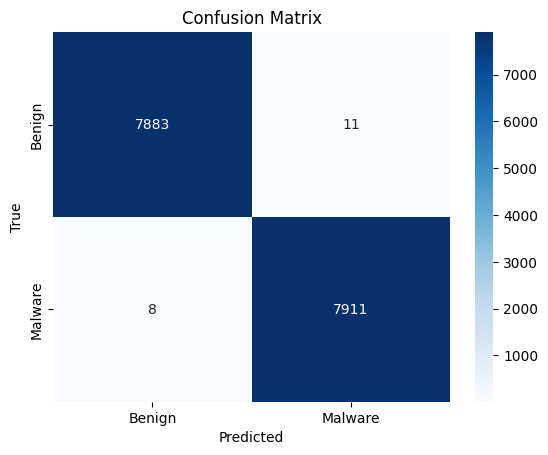

In [23]:
loss, acc , precision= model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test precision: {precision:.4f}")

# Classification Report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


  1/495 ━━━━━━━━━━━━━━━━━━━━ 1:26 175ms/step - accuracy: 1.0000 - loss: 0.0013 - recall: 1.0000

153/495 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.9985 - loss: 0.0044 - recall: 0.9992  

327/495 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.9984 - loss: 0.0046 - recall: 0.9987

495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.9985 - loss: 0.0044 - recall: 0.9987


Test Loss: 0.0036
Test Accuracy: 0.9989
Test precision: 0.9987


  1/495 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step

255/495 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step

495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step

495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7894
         1.0       1.00      1.00      1.00      7919

    accuracy                           1.00     15813
   macro avg       1.00      1.00      1.00     15813
weighted avg       1.00      1.00      1.00     15813



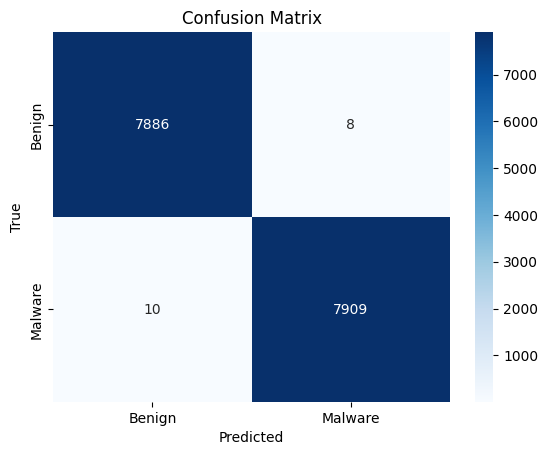

In [24]:
loss, acc , precision= lstm_bc.evaluate(X_test_lstm, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test precision: {precision:.4f}")

# Classification Report
y_pred = (lstm_bc.predict(X_test_lstm) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [25]:
# Save full model (preferred modern way)
model.save("global_FNN_model.keras")
lstm_bc.save("global_lstm_model.keras")